<a href="https://colab.research.google.com/github/chinmay29hub/stock-market-analysis/blob/main/ann_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
tf.__version__

'2.6.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
X_train=dataset_train.iloc[:-1,1:2].values  #creating a numarray that contains the open price of the stock
y_train=dataset_train.iloc[1:,1:2].values
X_test=dataset_test.iloc[:-1,1:2].values  #creating a numarray that contains the open price of the stock
y_test=dataset_test.iloc[1:,1:2].values

we are trying to predict the opening price using the previous days opening stock price


In [ ]:
print(y_test)

[[788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [ ]:
print(X_test)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]]


## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()#used to create a sequnece of layers


### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
40/40 [==============================] - 1s 1ms/step - loss: 266455.6875
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 218683.9062
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 170013.8750
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 111290.6172
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 50861.2500
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 12272.5557
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 1145.1472
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 91.7623
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 70.5851
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 70.6833
Epoch 11/100
40/40 [==============================] - 0s 1ms/step - loss: 70.8243
Epoch 12/100
40/40 [==============================] - 0s 1ms/step - loss: 70.6840
E

### Predicting the results of the Test set

In [ ]:
y_pred = ann.predict(X_test)
# np.set_printoptions(precision=2)#set the decimal place to 2
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))#reshaping horizontal to vertical vector
print(y_pred)
print(y_test)
print(y_pred-y_test)

[[777.72107]
 [787.24506]
 [784.9713 ]
 [794.12634]
 [805.2359 ]
 [806.692  ]
 [803.8398 ]
 [805.97394]
 [806.313  ]
 [805.9141 ]
 [804.6475 ]
 [803.9594 ]
 [805.74457]
 [806.0836 ]
 [821.09265]
 [828.3927 ]
 [836.5604 ]
 [833.4689 ]
 [813.4735 ]]
[[788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]
[[-10.63893066]
 [  1.16505615]
 [-10.28868652]
 [-12.27365723]
 [ -2.62409912]
 [  1.6920166 ]
 [ -3.30021729]
 [ -1.50606201]
 [ -0.76701172]
 [  0.10412354]
 [ -0.47247803]
 [ -2.95058838]
 [ -1.50543213]
 [-16.21638184]
 [ -8.52734863]
 [ -9.4172998 ]
 [  1.8504248 ]
 [ 18.80887207]
 [ 16.61351074]]


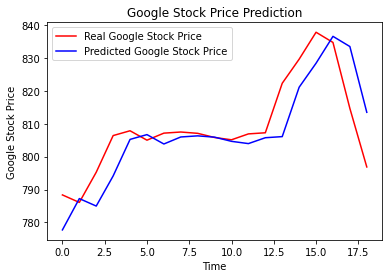

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


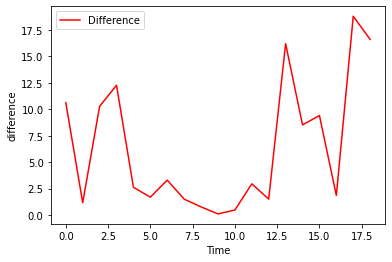

In [ ]:
plt.plot(abs(y_pred-y_test), color = 'red', label = 'Difference')
plt.xlabel('Time')
plt.ylabel('difference')
plt.legend()
plt.show()

In [ ]:
# dataset_test_1=pd.read_csv('WIPRO.NS.csv')
# X_test_1=dataset_test_1.iloc[:-1,1:2].values  #creating a numarray that contains the open price of the stock
# y_test_1=dataset_test_1.iloc[1:,1:2].values
# y_pred_1 = ann.predict(X_test_1)
# # np.set_printoptions(precision=2)#set the decimal place to 2
# # print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))#reshaping horizontal to vertical vector

# plt.plot(y_test_1[:15], color = 'red', label = 'Real Wipro Stock Price')
# plt.plot(y_pred_1[:15], color = 'blue', label = 'Predicted Wipro Stock Price')
# plt.title('Google Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
# plt.legend()
# plt.show()

In [ ]:
totalsum=abs(y_test-y_pred)
totalsum=np.sum(totalsum)/np.sum(y_test)
print(totalsum)


0.007853530756540744


Save model


In [ ]:
ann.save('ann.h5')